https://towardsdatascience.com/a-thorough-breakdown-of-efficientdet-for-object-detection-dc6a15788b73   
https://towardsdatascience.com/googles-efficientdet-an-overview-8d010fa15860   
https://ai.googleblog.com/2020/04/efficientdet-towards-scalable-and.html   
https://analyticsindiamag.com/efficientdet/   
https://amaarora.github.io/2021/01/11/efficientdet.html

# why Efficientdet?
- smaller model
- fast processing
- high accuracy

# overview of object detection
- backbone
- feature network 
- detection head
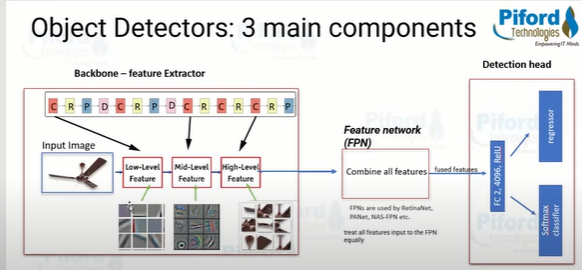 

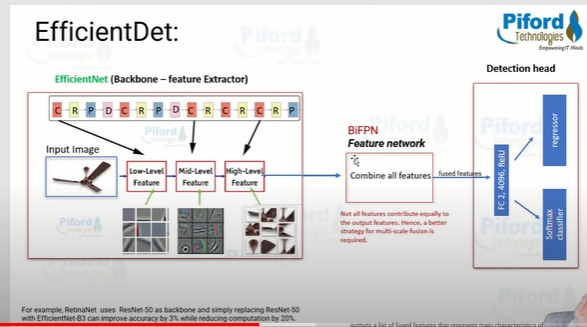

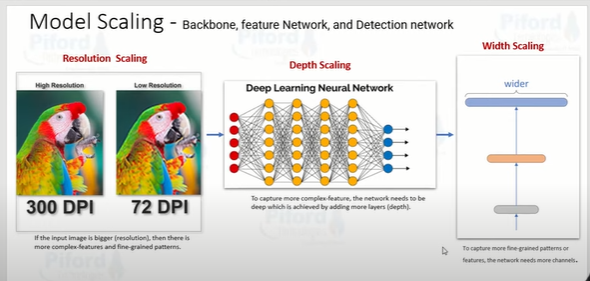

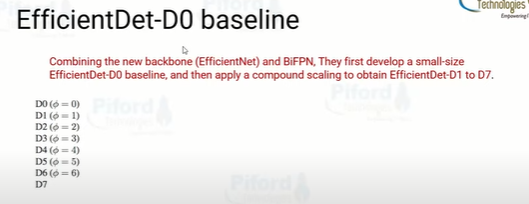

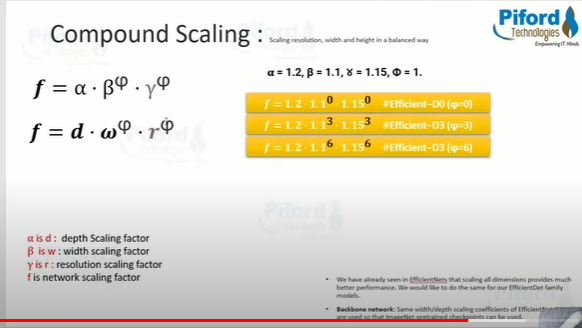

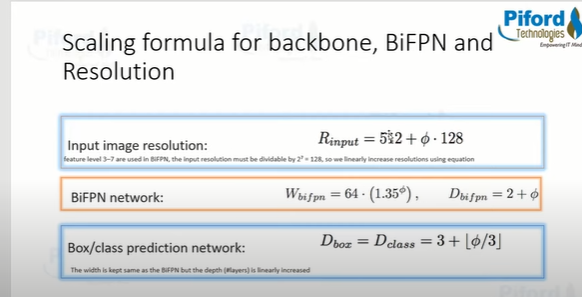

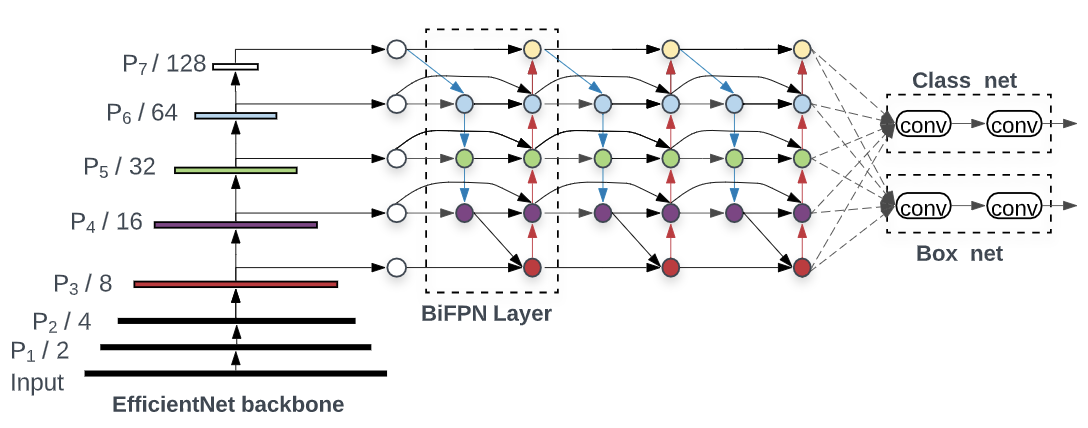
EfficientDet architecture. EfficientDet uses EfficientNet as the backbone network and a newly proposed BiFPN feature network.

- The BiFPN in this network serves as a feature network. It takes the features from the levels 3 - 7 from the backbone network and repeatedly applies the BiFPN. The fused features are fed into a class and box network to predict the object class and bounding box.

<b>the two main contributions of the EfficientDet architecture were:</b>

- BiFPN
- Compound Scaling

To get the EfficientDet Architecture, the authors simply used the ImageNet pretrained EfficientNet as the backbone network. This backbone extracts features from the Input P1-P7 where Pi represents feature level with resolution of 1/2i of the input image. For instance, if the input resolution is 640x640 then P3in represents feature level with resolution 80x80.

The proposed Bi-FPN accepts the P3-P7 features as input features and repeatedly applies cross-scale multi-scale fusion on these features as shown in fig to get a multi-scale feature representation of the image which is then fed to Class predciction net and Box prediction net to finally get class and bounding box outputs.

### some points for model optimization
- <b> In general, object detectors have three main components: a backbone that extracts features from the given image; a feature network that takes multiple levels of features from the backbone as input and outputs a list of fused features that represent salient characteristics of the image; and the final class/box network that uses the fused features to predict the class and location of each object.

- <b>Another optimization is to improve the efficiency of the feature networks. While most previous detectors simply employ a top-down feature pyramid network (FPN), we find top-down FPN is inherently limited by the one-way information flow. Alternative FPNs, such as PANet, add an additional bottom-up flow at the cost of more computation. Recent efforts to leverage neural architecture search (NAS) discovered the more complex NAS-FPN architecture. However, while this network structure is effective, it is also irregular and highly optimized for a specific task, which makes it difficult to adapt to other tasks.

<div class="burk">
<span class="girk"><span class="mark">To address second issues, we propose a new bi-directional feature network, BiFPN, which incorporates the multi-level feature fusion idea from FPN/PANet/NAS-FPN that enables information to flow in both the top-down and bottom-up directions, while using regular and efficient connections.</span></span></div><i class="fa fa-lightbulb-o "></i>

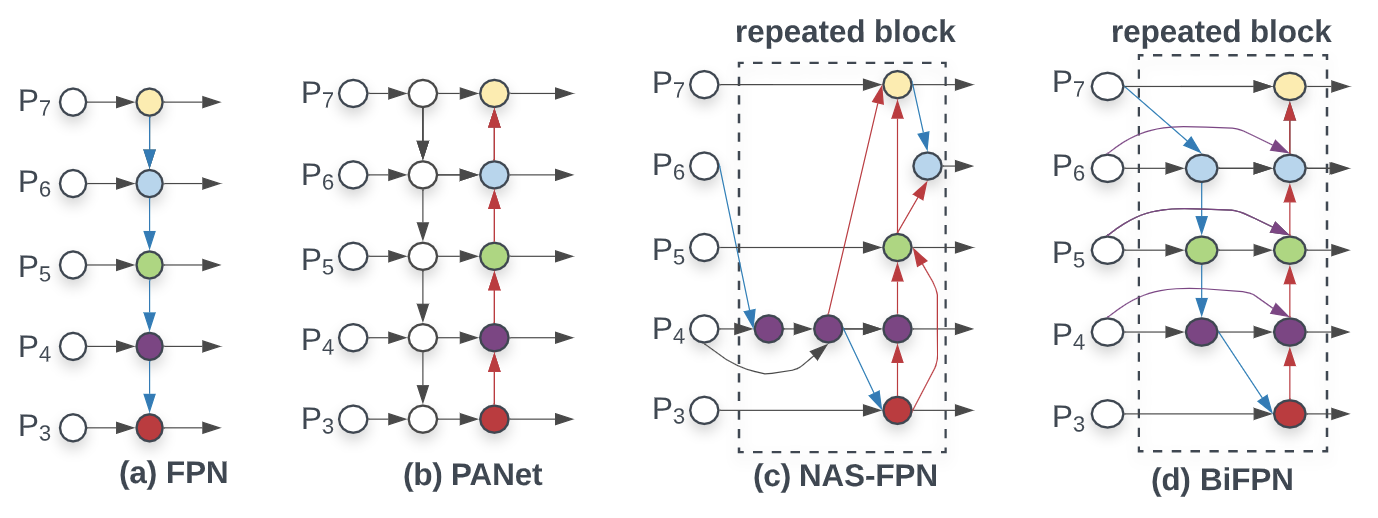 
A comparison between our BiFPN and previous feature networks. Our BiFPN allows features (from the low resolution P3 levels to high-resolution P7 levels) to repeatedly flow in both top-down and bottom-up ways. 

- To improve the efficiency even more, we propose a new fast normalized fusion technique. Traditional approaches usually treat all features input to the FPN equally, even those with different resolutions. However, we observe that input features at different resolutions often have unequal contributions to the output features. Thus, we add an additional weight for each input feature and allow the network to learn the importance of each. We also replace all regular convolutions with less expensive depthwise separable convolutions. With these optimizations, our BiFPN further improves the accuracy by 4%, while reducing the computation cost by 50%.

- <b>A third optimization </b> researchers propose a new compound scaling method for object detectors, which jointly scales up the resolution/depth/width. Each network component, i.e., backbone, feature, and box/class prediction network, will have a single compound scaling factor that controls all scaling dimensions using heuristic-based rules. This approach enables one to easily determine how to scale the model by computing the scaling factor for the given target resource constraints.

- Combining the new backbone and BiFPN, we first develop a small-size EfficientDet-D0 baseline, and then apply a compound scaling to obtain EfficientDet-D1 to D7. Each consecutive model has a higher compute cost, covering a wide range of resource constraints from 3 billion FLOPs to 300 billion FLOPS, and provides higher accuracy.

# EfficientDet: Scalable and Efficient Object Detection
## Challenge 1 - Efficient Multi-Scale Feature Fusion:
    - Feature Pyramid Networks (FPN) are widely used for multi-scale feature fusion. Recent works such as PANet and NAS-FPN          allow for cross-scale feature fusion. 
    -Previous feature fusion methods simply sum the features together, however, these features are at different resolutions          and have been observed to contribute to the output fused feature unequally. 
    -To get around this issue a weighted bi-directional feature pyramid network (BiFPN) is proposed. The BiFPN has                  learnable weights to determine the importance of different input features, which apply top-down and bottom-up              multi-scale feature fusion.

## Challenge 2 - Model Scaling: 
  - Model scaling of object detectors usually sacrifices either accuracy or efficiency. Inspired by the work done by the        authors of EfficientNets a compound scaling method for object detectors is proposed. Like EfficientNets this scaling        method also scales the depth, width and resolution of the network.
  
  - The combination of EfficientNet with the proposed BiFPN and compound scaling resulted in the creation of a new family         of detectors knows as EfficientDet. This family of models consistently achieved higher accuracy and reduced the             number of FLOPS by an order of magnitude compared to previous object detectors. The contribution of the EfficentDet         to the object detection community can be summarised into three points:
       1. <b>Introduction of the BiFPN. This is a weighted bidirectional feature network for easy and multi-scale feature              fusion</b>
       2. <b>Proposal of a scaling method, which scales the backbone, feature network, box/class network and resolution in            a principled way</b>
       3. <b>Combining the two points above resulted in EfficientDet, a new family of object detectors. These models have             significantly better accuracy and efficiency across a wide spectrum of resource constraints</b>
  

## BiFPN 
- To understand the contribution of the BiFPN we need to first formulate the problem. Multi-scale feature fusion aims to aggregate features at different resolutions. This can be represented as a list of multi-scale features:
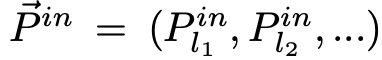 
where each element above represents the feature at level lᵢ. The aim is to find a transformation f that can aggregate the features and output a list of new features:  
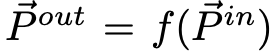

- To understand why this is important let's take a look at the traditional FPN which integrates features at different scales:
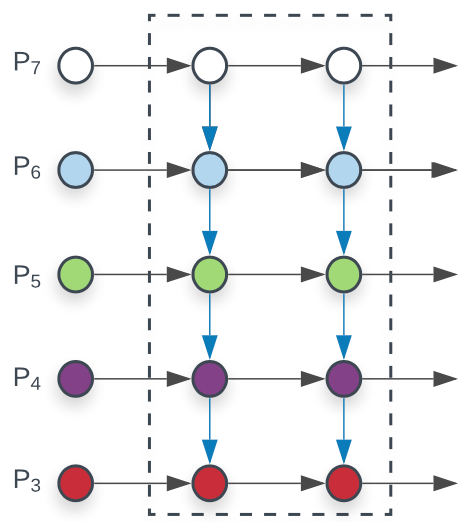 
It has 3–7 input features (P₃ - P₇) where each input feature represents a feature level with a given resolution. This FPN aggregates multi-scale features in a top-down manner:  

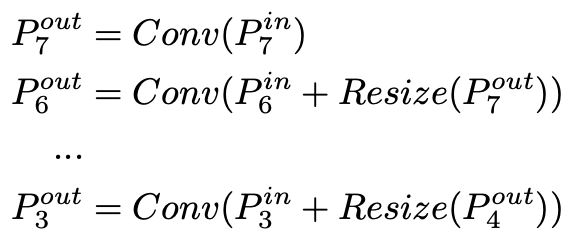 
Resize is typically the upsampling or downsampling operations for resolution matching. Finally, Conv is a convolution operation for feature processing. 

The FPN shown above is inherently limited by the flow of information in one direction. To get around this issue PANet adds a bottom-up path and the NAS-FPN uses neural architecture search to find better cross-scale feature network topology. Both these network designs are shown in the image below:  
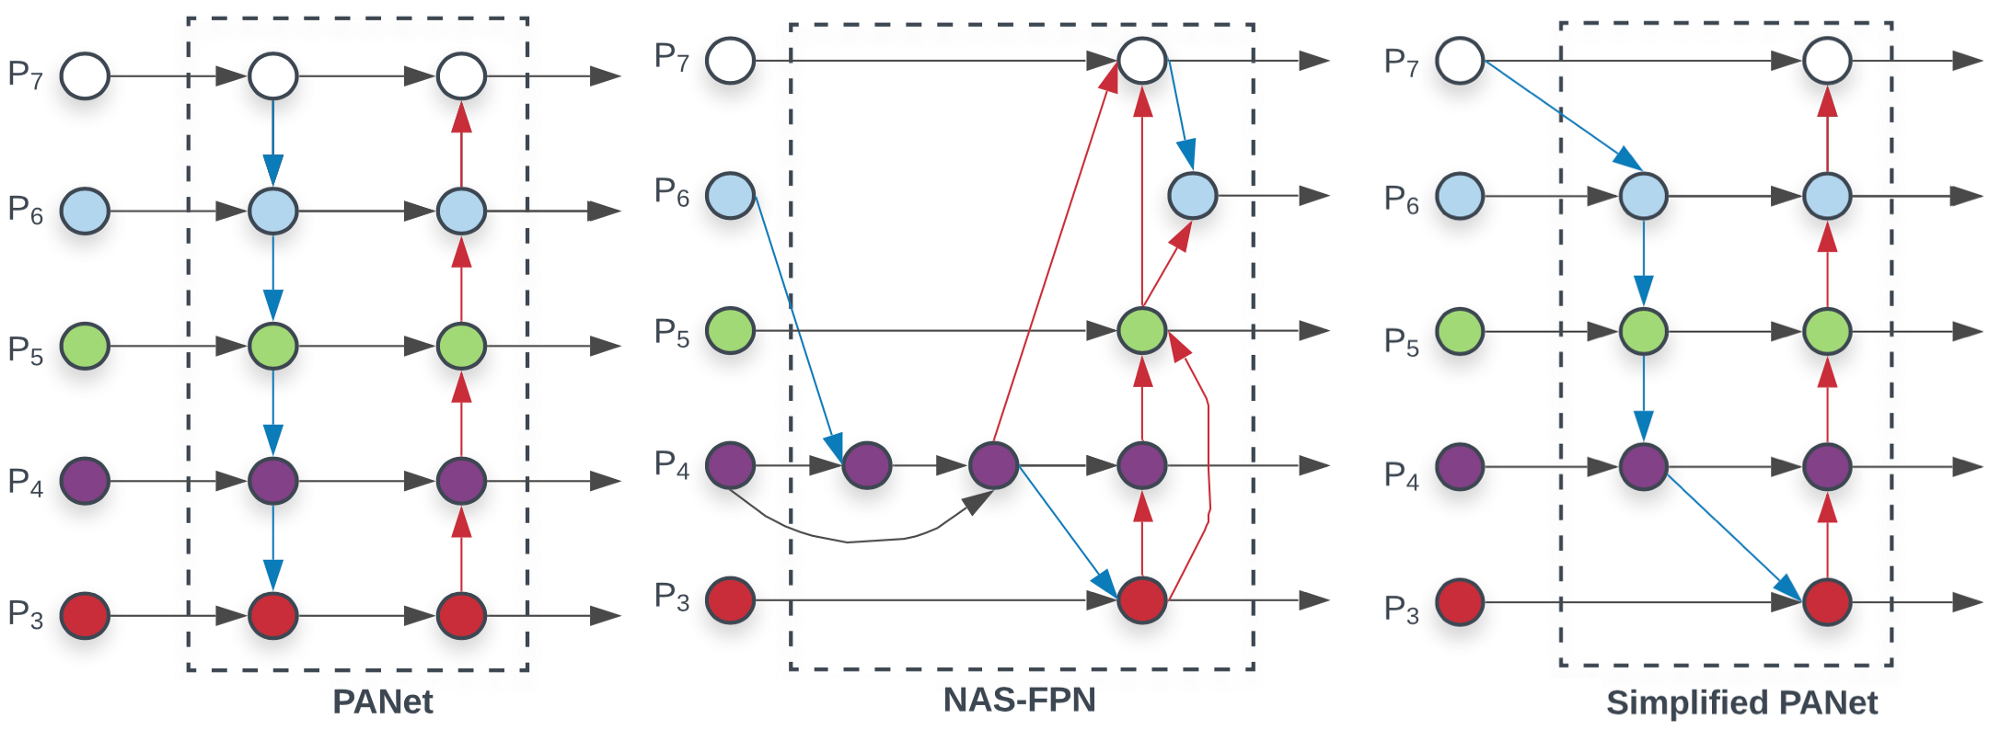 

The authors show that PANet achieves better accuracy than NAS-FPN, but at the cost of more parameters and computations. Several optimisations were proposed:  
- Remove nodes that only have one input edge. If a node has only one input edge with no feature fusion, then it is likely to contribute less to the feature network objective. This leads to a simplified PANet (above)
- An extra edge is added from the input node to the output node only at the same level. This will fuse more features together without much additional cost (BiFPN, Below) 
- There is bidirectional information flow (both top-down and bottom-up). Each bidirectional path is treated as its own layer and therefore allows for the layers to be repeated enabling more high level-feature fusion (BiFPN, Below) 

With these optimisations, the new feature network is termed bidirectional feature pyramid network (BiFPN). The BiFPN is illustrated in the figure below:  

### Weighted Feature Fusion 
- As mentioned earlier, the fusion of features at different resolutions typically involves resizing them followed by a sum operation. <b>The drawback of this method is that all features are treated equally</b>. Since these features are at different resolutions they usually contribute to the output feature unequally. 
- To get around this an additional weight for each input feature is calculated to allow the network to learn the importance of each feature. A total of three weighted fusion approaches were tested: 
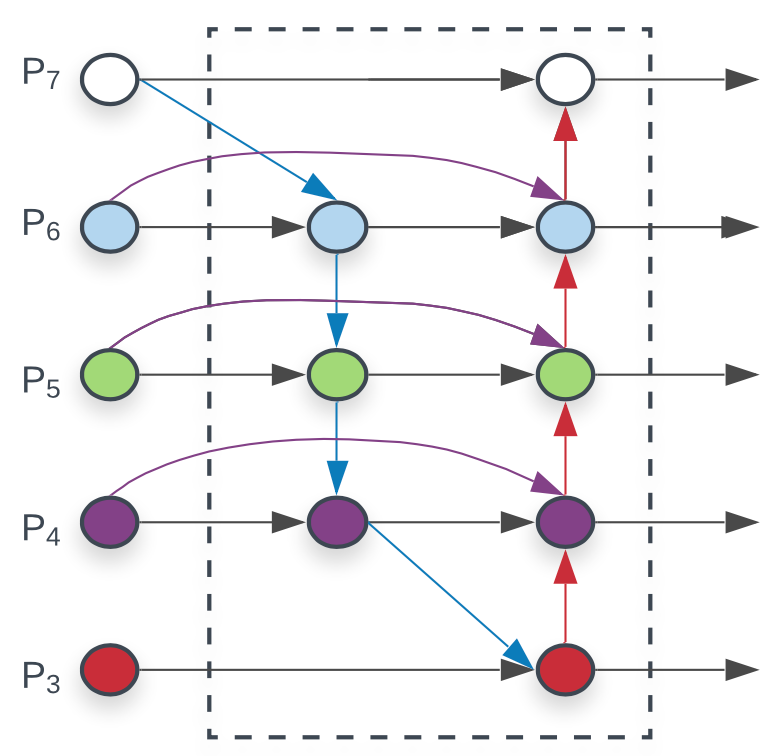 

#### Unbounded Fusion:
- This contains an unbounded learnable weight. However, since it is unbounded it can cause training instability, so was discarded 

#### Softmax-based fusion:
- Apply a softmax to each weight thus limiting the weight between 0 and 1, but this lead to a significant increase in latency. 
#### Fast normalised fusion: 
- The equation is shown below. Each weight (ωᵢ) is ensured to be greater than or equal to zero via the application of a Relu. The ϵ is set to 0.001 to avoid numerical stability. This calculation was shown to be 30% faster on GPUs compared to the softmax-based method. 

     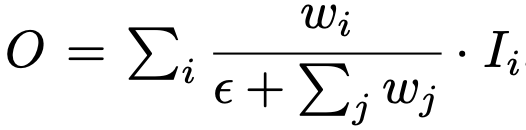 
        
The final BiFPN integrates both bidirectional cross-scale connections the fast normalisation method. An example of this is shown below, which is the 6th layer in the BiFPN:
         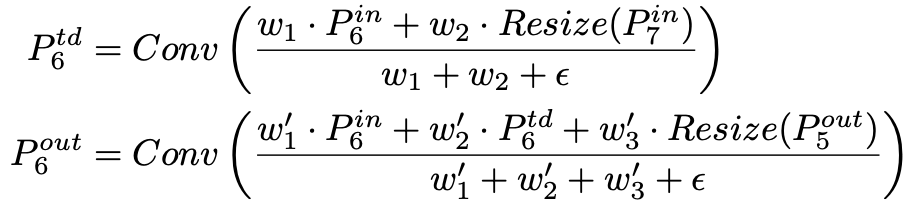
         
         The top equation is the intermediate for the top-down pathway and the bottom is the equation for the bottom-up pathway.

## Compound Scaling  
Inspired by the compound scaling used in EfficientNets a new compound scaling method was proposed for object detection. This method uses a coefficient (Φ) to jointly scale-up all dimensions of the backbone network, BiFPN network, class/box network and resolution. The scaling of each network component is described below: 
    - <b>Backbone network:</b> Use the same coefficients as defined in B0-B6 so their ImageNet pre-trained weights can be                                 reused
    - <b>BiFPN:</b> The width is exponentially grown (channels) and the depth is linearly increased (layers). Formally, the                     width and depth are scaled using the following equation:
    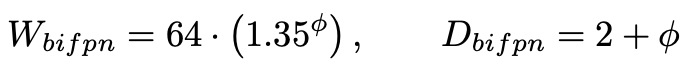 
    
   - <b>Box/class prediction network:</b> The width is fixed to be the same as in the BiFPN but the depth is linearly                                                increased as follows:
    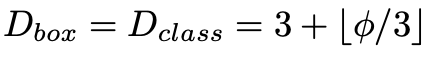   
   - <b>Input Image Resolution:</b>  The resolution is also increased linearly since the resolution must be dividable by 2⁷                                     = 128. This is achieved with the equation below:
   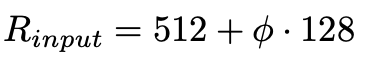 
   
   Using the three equations shown above a family networks is created from EfficientDet-D0 (Φ = 0) to D6 (Φ = 6). This further elaborated upon in the table below:
   
   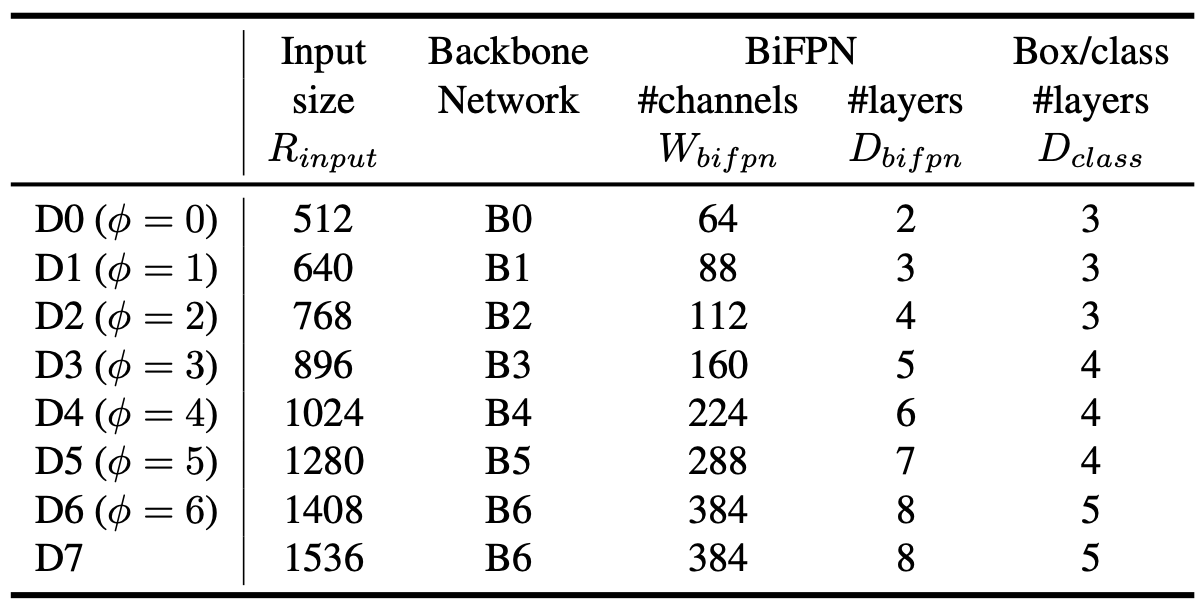
   The table also contains a D7 model which could not fit into memory unless the batch size was changed or other settings. As a result, the D6 model was expanded to D7 by only increasing the input image resolution. 

# what are the main contributions in the Feature Pyramid Network research paper?
In a feature pyramid network, the authors used the inherent pyramidal structure and multi-scale property of a CNN and used top-down and lateral connections to connect high semantic layers (later layers of a CNN) with low semantic layers (earlier layers of a CNN) such that a high-level semantic feature maps exists at all scales and thus leading to better multi-scale object detection from a single sized original image.

 